<a href="https://colab.research.google.com/github/vraj1231/DATA245_-Delivery_time_prediction/blob/main/Model%20files/%20Baseline_model_245_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting drive and loading data 

In [ ]:
from google.colab import drive #using google drive for storage
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns #all libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt

In [ ]:
#converting the file tsv -? csv
# tsv_file= r'C:\Users\mistr\OneDrive\Documents\SJSU studies\DATA 245\project\train.tsv'
# csv_table=pd.read_table(tsv_file,sep='\t')
# csv_table.to_csv('train_ebay.csv',index=False)

In [ ]:
#pandas dataframe train and test from google drive 
# dataset_test = pd.read_csv("gdrive/My Drive/quiz.csv")
dataset = pd.read_csv("gdrive/My Drive/train_ebay.csv")
dataset.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


### Data columns 

In [ ]:
dataset.describe(include="all") #describe of all features in dataset

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
count,15000000,1.500000e+07,1.429711e+07,15000000,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,14999999,14999999,1.500000e+07,1.500000e+07,1.500000e+07,15000000,15000000,1.500000e+07,1.500000e+07,15000000,1.500000e+07
unique,2,NaN,NaN,2245193,NaN,NaN,NaN,NaN,50939,57273,NaN,NaN,NaN,14090416,767,NaN,NaN,7,NaN
top,B2C,NaN,NaN,2019-04-01 00:00:00.000-04:00,NaN,NaN,NaN,NaN,91748,000,NaN,NaN,NaN,2019-02-18 23:48:57.000-06:00,2018-12-10,NaN,NaN,PACKAGE_THICK_ENVELOPE,NaN
freq,10634413,NaN,NaN,2856,NaN,NaN,NaN,NaN,65222,72650,NaN,NaN,NaN,9,54835,NaN,NaN,12652645,NaN
mean,NaN,2.711038e+05,1.620950e+00,NaN,8.818957e-01,2.811783e+00,2.622133e+00,5.462125e+00,NaN,NaN,6.754900e+00,3.613771e+01,1.105763e+00,NaN,NaN,1.608175e+01,1.000002e+00,NaN,7.500000e+06
std,NaN,6.749299e+05,1.498844e+00,NaN,1.657330e+00,5.373618e+00,4.873855e-01,1.229274e+00,NaN,NaN,6.569869e+00,1.099163e+02,1.005447e+00,NaN,NaN,3.254291e+02,1.549192e-03,NaN,4.330127e+06
min,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,NaN,1.000000e+00
25%,NaN,5.018000e+03,1.000000e+00,NaN,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,NaN,NaN,1.000000e+00,8.750000e+00,1.000000e+00,NaN,NaN,0.000000e+00,1.000000e+00,NaN,3.750001e+06
50%,NaN,3.743600e+04,1.000000e+00,NaN,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00,NaN,NaN,5.000000e+00,1.500000e+01,1.000000e+00,NaN,NaN,4.000000e+00,1.000000e+00,NaN,7.500000e+06
75%,NaN,2.035330e+05,2.000000e+00,NaN,1.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,NaN,NaN,1.100000e+01,3.025000e+01,1.000000e+00,NaN,NaN,1.600000e+01,1.000000e+00,NaN,1.125000e+07


In [ ]:
#data types of the columns 
dataset.dtypes

b2c_c2c                       object
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp     object
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime              object
delivery_date                 object
weight                         int64
weight_units                   int64
package_size                  object
record_number                  int64
dtype: object

In [ ]:
dataset = dataset.dropna()

In [ ]:
# number of counts for each value
# dataset_train["b2c_c2c"].value_counts()
#  unqiues values for all object types
# for col in dataset_train.select_dtypes(include= "object").columns:
#     print ( f'{dataset_train[col]} : {len (dataset_train[col].unique())}')
# missing value for each columns 
# for col, i in enumerate(dataset_train):
#     print( "\033[1m" + f'{dataset_train.columns[col]} has {dataset_train[i].isna().sum()} missing values')
# heatmap for only numeric values
# corr = dataset_train.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)
# dataset_train.corr()

### Data Cleaning

In [ ]:

def data_cleaning(dataset_train):
    dataset_train['delivery_date'] = pd.to_datetime(dataset_train['delivery_date'], errors = "coerce", utc=True)
    dataset_train['payment_datetime'] = pd.to_datetime(dataset_train['payment_datetime'], errors = "coerce", utc=True)
    dataset_train['acceptance_scan_timestamp'] = pd.to_datetime(dataset_train['acceptance_scan_timestamp'], errors='coerce', utc=True)
    dataset_train['actual_delivery_time'] = abs ((dataset_train.loc[:,'payment_datetime'] - dataset_train.loc[:,'delivery_date']).dt.days)
    dataset_train['acceptance_scan_timestamp'] = abs ((dataset_train.loc[:,'acceptance_scan_timestamp'] - dataset_train.loc[:,'payment_datetime']).dt.days)
    dataset_train["item_zip"] = pd.to_numeric (dataset_train["item_zip"] , errors = "coerce")
    dataset_train["buyer_zip"] = pd.to_numeric(dataset_train["buyer_zip"], errors = "coerce")
    lab_encoder_package_size = LabelEncoder()
    lab_encoder_package_size.fit(dataset_train["package_size"])
    dataset_train["package_size"] = pd.DataFrame(lab_encoder_package_size.transform(dataset_train["package_size"]))
    lab_encoder_b2c =  LabelEncoder()
    lab_encoder_b2c.fit(dataset_train["b2c_c2c"])
    dataset_train["b2c_c2c"] = pd.DataFrame(lab_encoder_b2c.transform(dataset_train["b2c_c2c"]))
    return dataset_train


dataset_train_updated = data_cleaning(dataset)

In [ ]:
 #correlations after all columns convertedi into numeric form
 corr = dataset_train_updated.corr()

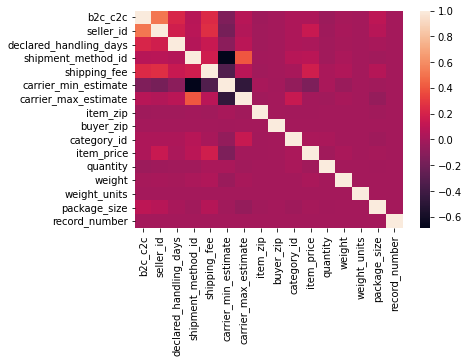

In [ ]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
# checking missing value for each columns 
for col, i in enumerate(dataset_train_updated):
    print( "\033[1m" + f'{dataset_train_updated.columns[col]} has {dataset_train_updated[i].isna().sum()} missing values')

b2c_c2c has 0 missing values
seller_id has 0 missing values
declared_handling_days has 702886 missing values
acceptance_scan_timestamp has 0 missing values
shipment_method_id has 0 missing values
shipping_fee has 0 missing values
carrier_min_estimate has 0 missing values
carrier_max_estimate has 0 missing values
item_zip has 173425 missing values
buyer_zip has 18995 missing values
category_id has 0 missing values
item_price has 0 missing values
quantity has 0 missing values
payment_datetime has 0 missing values
delivery_date has 0 missing values
weight has 0 missing values
weight_units has 0 missing values
package_size has 0 missing values
record_number has 0 missing values


In [ ]:
#dropping missing values 
dataset_train_updated = dataset_train_updated.dropna()

In [ ]:
# confirm missing values 
# for col, i in enumerate(dataset_train_updated):
#     print( "\033[1m" + f'{dataset_train_updated.columns[col]} has {dataset_train_updated[i].isna().sum()} missing values')

In [ ]:
# df_train, df_test = train_test_split(dataset_train_updated, test_size=0.6)
# df_train.shape

(5644316, 19)

In [ ]:
# df_train.to_csv("main.csv")

In [ ]:
# from google.colab import files
# files.download("main.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Features and target data splitting

In [ ]:
#seperating features and target from the dataset for model prediction
features = df_train.drop(["delivery_date", "payment_datetime", "actual_delivery_time", "seller_id"], axis =1)
target = df_train["actual_delivery_time"]


In [ ]:
#80-20 ratio for train and test data on training instances
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(features ,labels, test_size= 0.2)


### Random Forest Regression

In [2]:
#using sklearn to build random forest model baseline
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators= 200, max_depth = 30, random_state = 42, n_jobs= -1, min_samples_leaf= 4, min_samples_split= 2)

rforest = random_forest.fit(X_train, y_train)



In [ ]:
y_pred = rforest.predict(X_test)

y_pred.shape

(1128864,)

In [ ]:
#MSE score for the training model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

2.6862186641467685

### Ridge and Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

model_ridge = Ridge(alpha= 10, fit_intercept= True)

model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

#Mean squared error
mse = mean_squared_error(y_test, y_pred_ridge)
mse

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.73724e-21): result may not be accurate.
  overwrite_a=True).T


3.368377738737289

In [ ]:
model_lasso = Lasso(alpha= 0.3, fit_intercept=True)

model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

#Mean squared error
mse = mean_squared_error(y_test, y_pred_lasso)
mse

3.448705400748785

### Saving the models

In [ ]:
#saving model
import joblib

joblib.dump(rforest, "my_random_forest_max10_245.joblib")
files.download("my_random_forest_max10_245.joblib")

#loaded_rf = joblib.load("my_random_forest.joblib")   #this is to load

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>